# Credit Card Customer Data
A Customer Credit Card Information Dataset which can be used for Identifying Loyal Customers, Customer Segmentation, Targeted Marketing and other such use cases in the Marketing Industry.


## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

# Loading Data

In [2]:
#/kaggle/input/credit-card-customer-data/Credit Card Customer Data.csv
creditCardData = pd.read_csv('../input/credit_card_customer_data.csv')

In [3]:
creditCardData.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [4]:
creditCardData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [5]:
creditCardData = creditCardData.loc[:, creditCardData.columns!='Sl_No'].set_index('Customer Key')

In [6]:
creditCardData.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


array([[<AxesSubplot:title={'center':'Avg_Credit_Limit'}>,
        <AxesSubplot:title={'center':'Total_Credit_Cards'}>],
       [<AxesSubplot:title={'center':'Total_visits_bank'}>,
        <AxesSubplot:title={'center':'Total_visits_online'}>],
       [<AxesSubplot:title={'center':'Total_calls_made'}>,
        <AxesSubplot:>]], dtype=object)

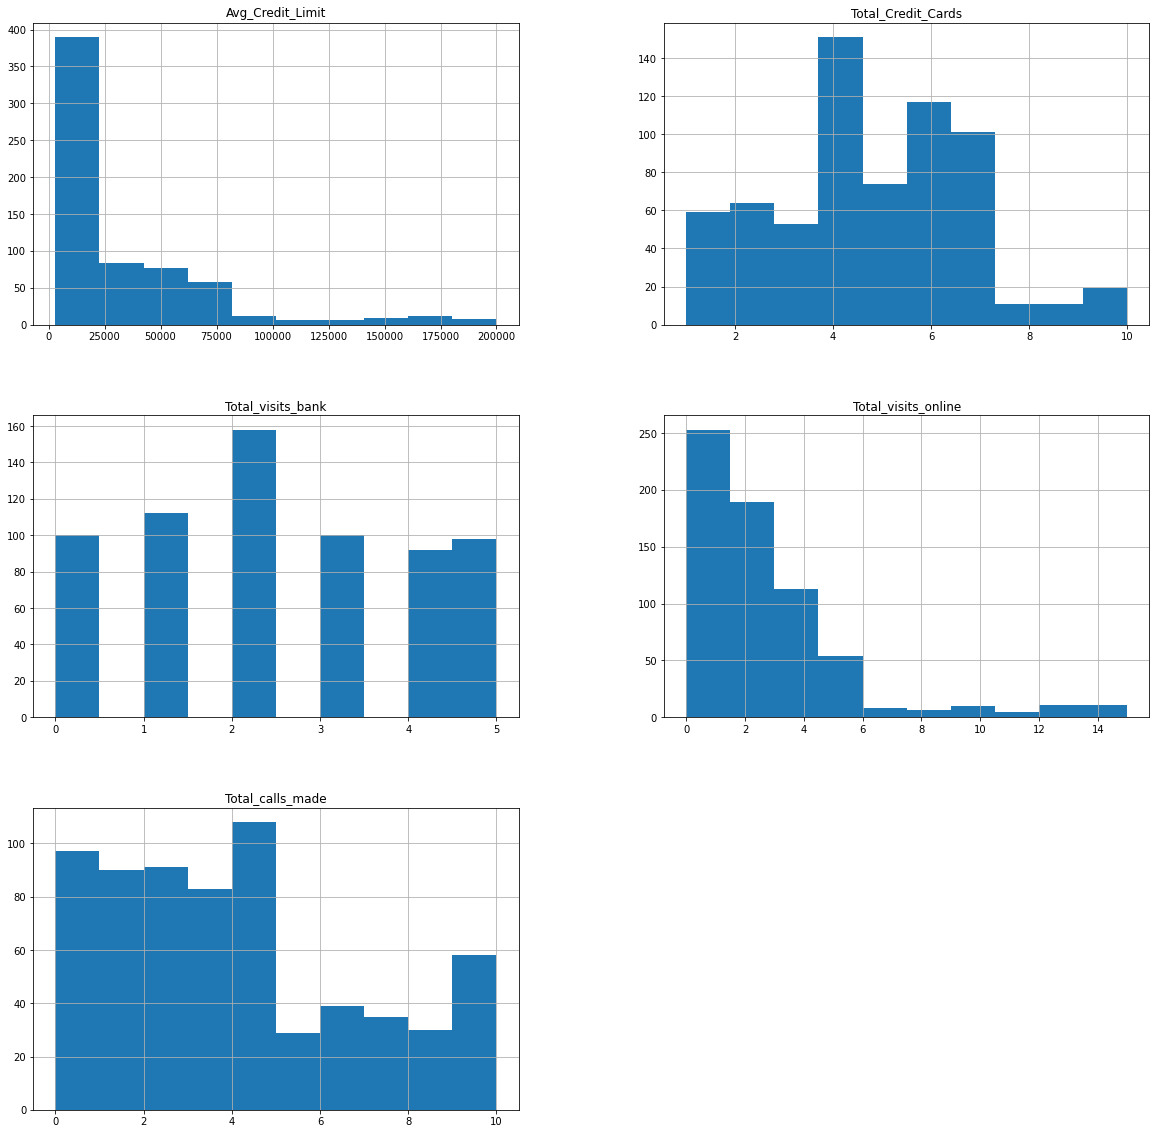

In [7]:
creditCardData.hist(figsize=(20, 20))

# Data Preprocessing
## Standardization

In [92]:
scaler = StandardScaler()
# Standardizing the features
standardData = scaler.fit(creditCardData)
scaledData = pd.DataFrame(scaler.transform(creditCardData),columns= creditCardData.columns )

In [93]:
scaledData.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,6.600000e+02,6.600000e+02,6.600000e+02,6.600000e+02,6.600000e+02
mean,8.195465e-16,-4.006223e-15,1.157323e-16,1.944572e-16,-7.112156e-16
std,1.000758e+00,1.000758e+00,1.000758e+00,1.000758e+00,1.000758e+00
min,-8.398081e-01,-1.710864e+00,-1.473731e+00,-8.883795e-01,-1.251537e+00
25%,-6.536229e-01,-7.875852e-01,-8.604506e-01,-5.474897e-01,-9.022711e-01
50%,-4.408398e-01,1.356941e-01,-2.471705e-01,-2.065999e-01,-2.037386e-01
75%,3.570968e-01,5.973337e-01,9.793898e-01,4.751797e-01,4.947938e-01
max,4.399975e+00,2.443892e+00,1.592670e+00,4.224968e+00,2.241125e+00


# Principal Component Analysis (PCA)

In [94]:
pca = PCA(n_components = 3)
principalComponents = pca.fit_transform(scaledData)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [95]:
print('Mean vector: ', pca.mean_)
print('Projection: ', pca.components_)
print ('Explained variance ratio: ', pca.explained_variance_ratio_)

Mean vector:  [ 8.61263922e-17  4.30631961e-17 -4.30631961e-17  7.53605932e-17
 -8.61263922e-17]
Projection:  [[ 0.48885901  0.59767943  0.28049227  0.11178284 -0.55912866]
 [ 0.40323959  0.03017103 -0.58658661  0.66516108  0.22352726]
 [ 0.00346147 -0.28498293 -0.6135219  -0.3049481  -0.67035086]]
Explained variance ratio:  [0.45736578 0.37426483 0.06401348]


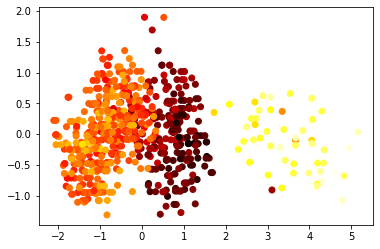

In [96]:
plt.scatter(principalComponents[:, 1],  principalComponents[:, 2], c=principalComponents[:, 0], cmap='hot')

In [97]:
# Principal components correlation coefficients
loadings = pca.components_
 
# Number of features before PCA
n_features = pca.n_features_
 
# Feature names before PCA
featureNames = scaledData.columns
 
# PC names
principalComponentsList = [f'PC{i}' for i in list(range(1, n_features + 1))]
 
# Match PC names to loadings
principalComponentsLoadings = dict(zip(principalComponentsList, loadings))
 
# Matrix of corr coefs between feature names and PCs
loadings_df = pd.DataFrame.from_dict(principalComponentsLoadings)
loadings_df['feature_names'] = featureNames
loadings_df = loadings_df.set_index('feature_names')
loadings_df

,PC1,PC2,PC3
feature_names,,,
Avg_Credit_Limit,0.488859,0.403240,0.003461
Total_Credit_Cards,0.597679,0.030171,-0.284983
Total_visits_bank,0.280492,-0.586587,-0.613522
Total_visits_online,0.111783,0.665161,-0.304948
Total_calls_made,-0.559129,0.223527,-0.670351


Text(0.5, 0, 'PC1')

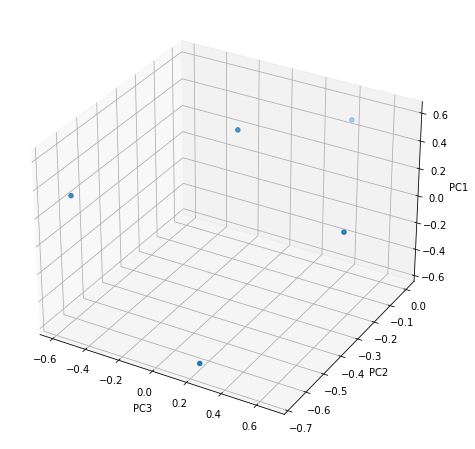

In [116]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(loadings[1], loadings[2],loadings[0])
ax.set_xlabel('PC3')
ax.set_ylabel('PC2')
ax.set_zlabel('PC1')

Text(0.5, 0, 'PC1')

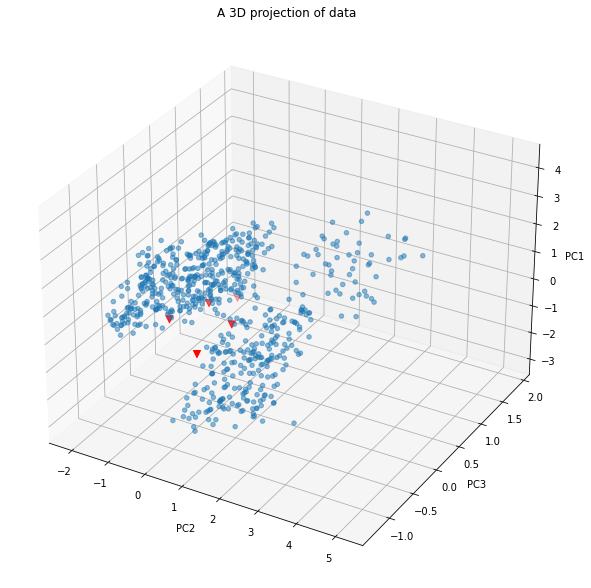

In [117]:
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(loadings[1], loadings[2], loadings[0], c='red', marker='v', s=50)
ax.scatter(principalComponents[:, 1], principalComponents[:, 2], principalComponents[:, 0], alpha=0.5)
ax.set_title("A 3D projection of data")
ax.set_xlabel('PC2')
ax.set_ylabel('PC3')
ax.set_zlabel('PC1')

<AxesSubplot:ylabel='feature_names'>

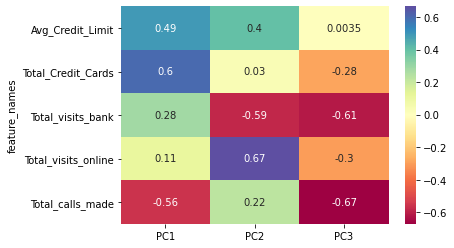

In [100]:
#get correlation matrix plot for loadings
sns.heatmap(loadings_df, annot=True, cmap='Spectral')

# Clustering

In [108]:
model = KMeans(n_clusters=3)
scaledData['cluster_label'] = model.fit_predict(scaledData)

In [109]:
scaledData

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cluster_label
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,0
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,1
2,0.410293,1.058973,-0.860451,0.134290,0.145528,0
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,0
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,2
...,...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537,2
656,1.314621,2.443892,-0.860451,3.543188,-0.553005,2
657,2.937092,1.520613,-0.860451,2.179629,-0.902271,2
658,3.655235,2.443892,-0.860451,4.224968,-1.251537,2


Text(0, 0.5, 'PC2')

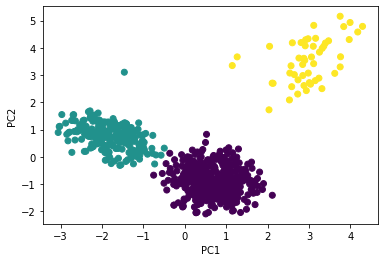

In [136]:
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=scaledData['cluster_label'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')

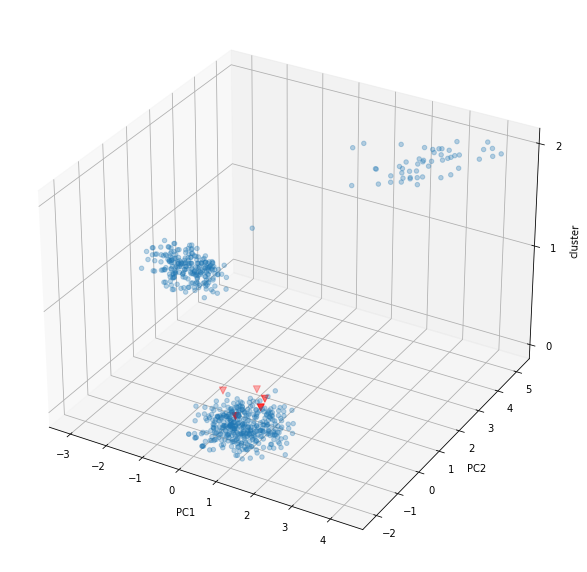

In [124]:
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(principalComponents[:, 0], principalComponents[:, 1],  scaledData['cluster_label'], alpha=0.3)
ax.scatter(loadings[0], loadings[1], c='red', marker='v', s=50)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('cluster')
ax.set_zticks([0, 1, 2])